In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
spaceserver = pd.read_csv('Space_Server.csv')
spaceserver.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
spaceserver.tail(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [4]:
spaceserver.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
spaceserver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
spaceserver.shape

(10000, 18)

# Cleansing of data

In [7]:
space_data = spaceserver.copy()

In [8]:
# finding some problem with column name class, hence renaming it
space_data.rename(columns={'class':'clas'}, inplace=True)

In [9]:
space_data['clas'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [10]:
space_data.clas.value_counts(dropna=False)

GALAXY    4998
STAR      4152
QSO        850
Name: clas, dtype: int64

In [11]:
space_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  clas       10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [12]:
# importing label encoder to convert object dtype to int dtype
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

space_data['clas'] = label_encoder.fit_transform(space_data['clas'])

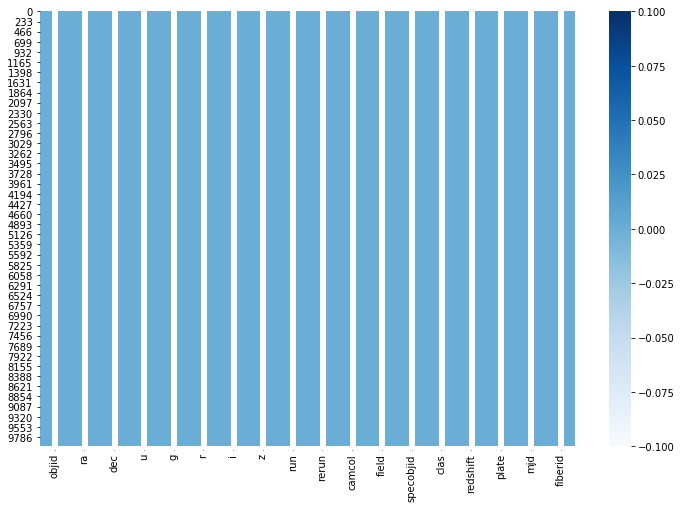

In [13]:
# Checking wheather there are any null values present using heatmap

plt.figure(figsize=(12,8))
sns.heatmap(space_data.isnull(),cmap="Blues",annot=True)
plt.show()
# data has no null value

In [14]:
# Checking the null value without using visualization
space_data.isnull().sum()
# No null value is reflecting in the dataset

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
clas         0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [15]:
# Dropping columns

space_data.drop(['objid','specobjid','run','rerun','camcol','field'], inplace=True, axis=1)

# objid and specobjid are just identifiers in the dataset
# run, rerun, camcol and field are features which describe a field within an image taken by the SDSS i.e camera lense

In [16]:
space_data.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'clas', 'redshift', 'plate',
       'mjd', 'fiberid'],
      dtype='object')

# Summary Statistics

In [17]:
space_data.describe()
# there is differrence between mean and 50%
# 75% and max also got good gifferences in data
# there may be outlier present 

,ra,dec,u,g,r,i,z,clas,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,2.000000,5.353854,8410.000000,57481.000000,1000.000000


# Data Visualization

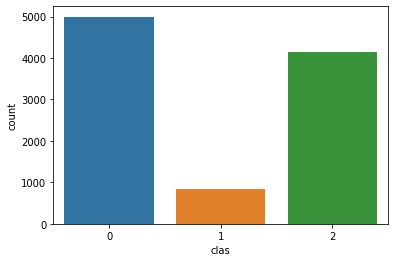

In [18]:
# getting info of target variable using plots
sns.countplot(space_data['clas'])
# Around 50% of the observation truned to be galaxy followed by star and Quasars (Qso)

<Figure size 864x576 with 0 Axes>

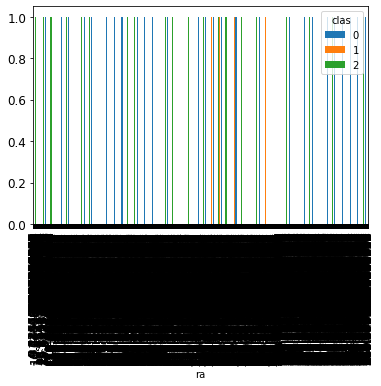

In [19]:
# Relationship of Class with ra
plt.figure(figsize=(12,8))
space_data.groupby(['clas','ra']).size().unstack("clas").plot(kind="bar",fontsize=12)

<Figure size 864x576 with 0 Axes>

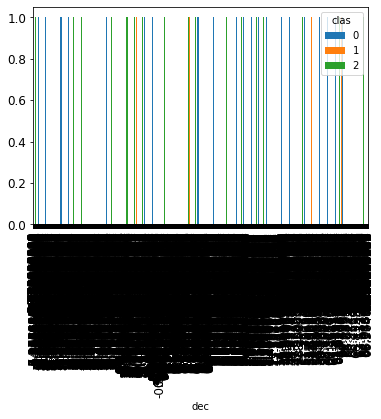

In [20]:
# Relationship of Class with dec
plt.figure(figsize=(12,8))
space_data.groupby(['clas','dec']).size().unstack("clas").plot(kind="bar",fontsize=12)

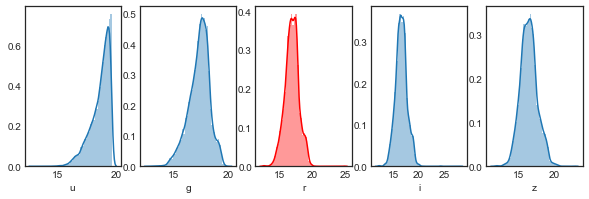

In [21]:
# visualization for response of the 5 bands of the telescope.
plt.figure(figsize=(24,24))
plt.style.use('seaborn-white')

plt.subplot(351)
sns.distplot(space_data['u'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(352)
sns.distplot(space_data['g'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(353)
sns.distplot(space_data['r'],color='red')
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(354)
sns.distplot(space_data['i'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(355)
sns.distplot(space_data['z'])
fig = plt.gcf()
fig.set_size_inches(10,10)

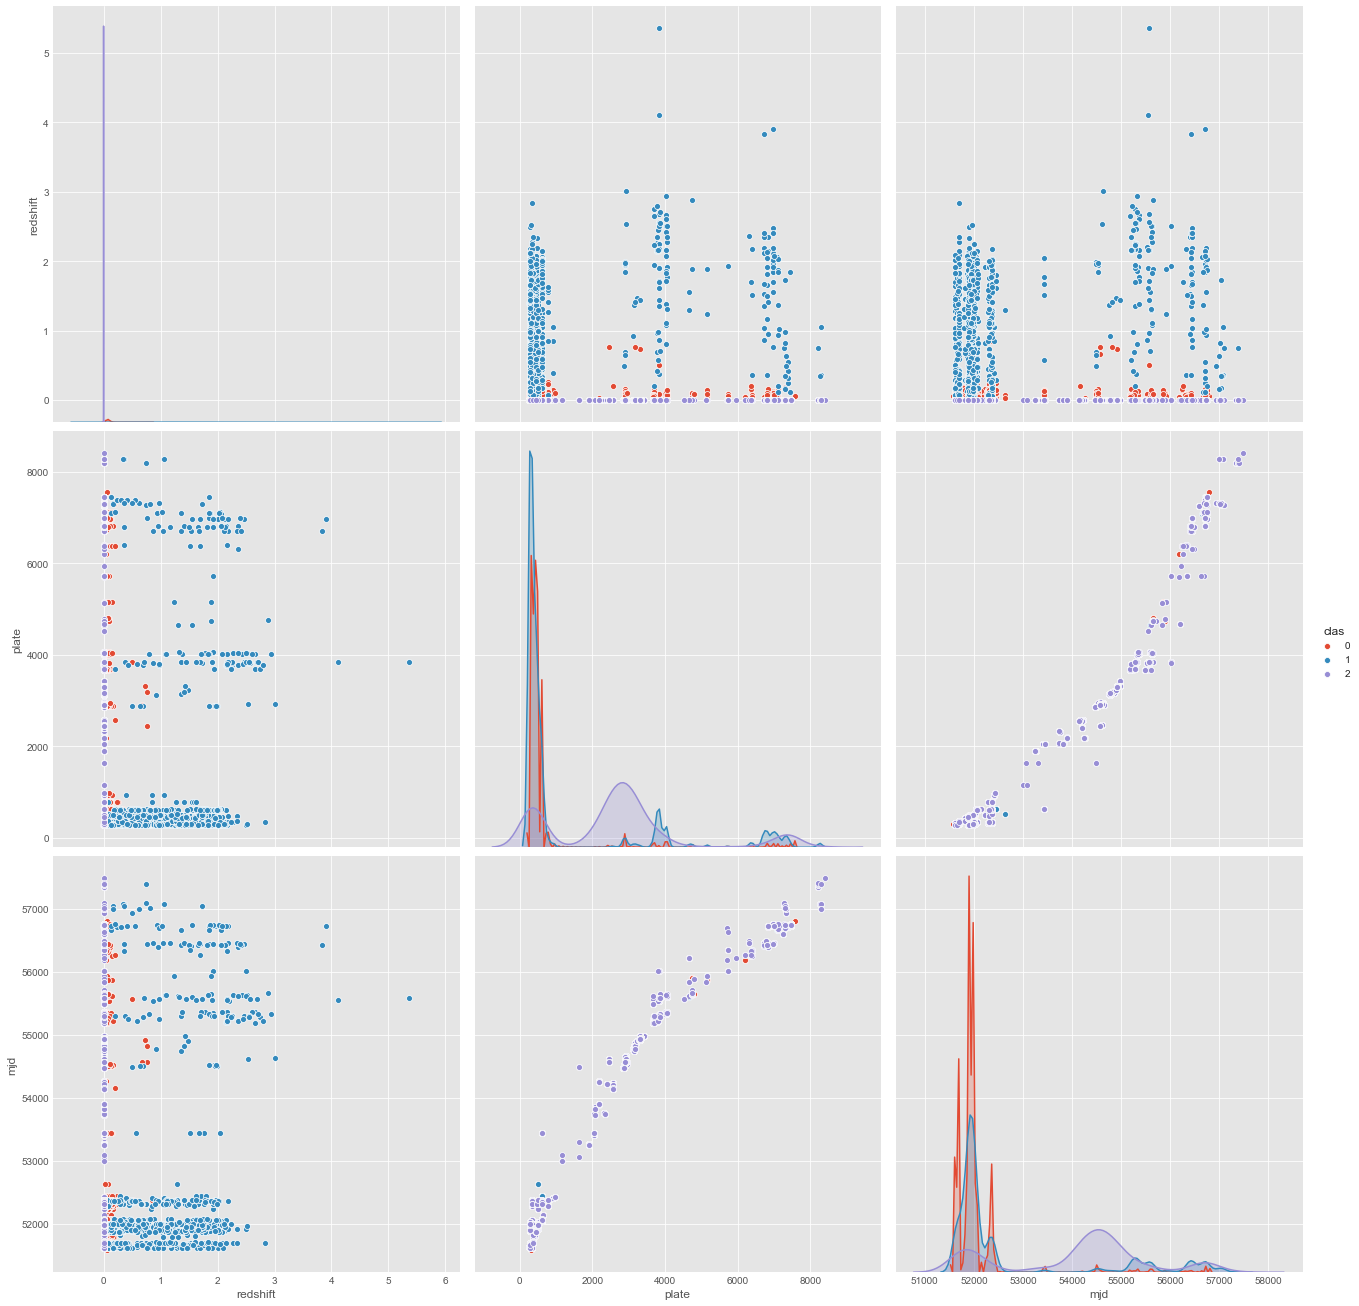

In [22]:
# relationship with plate and mjd
plt.style.use('ggplot')
chart = sns.pairplot(space_data, vars=['redshift','plate','mjd'], hue='clas',size=6)

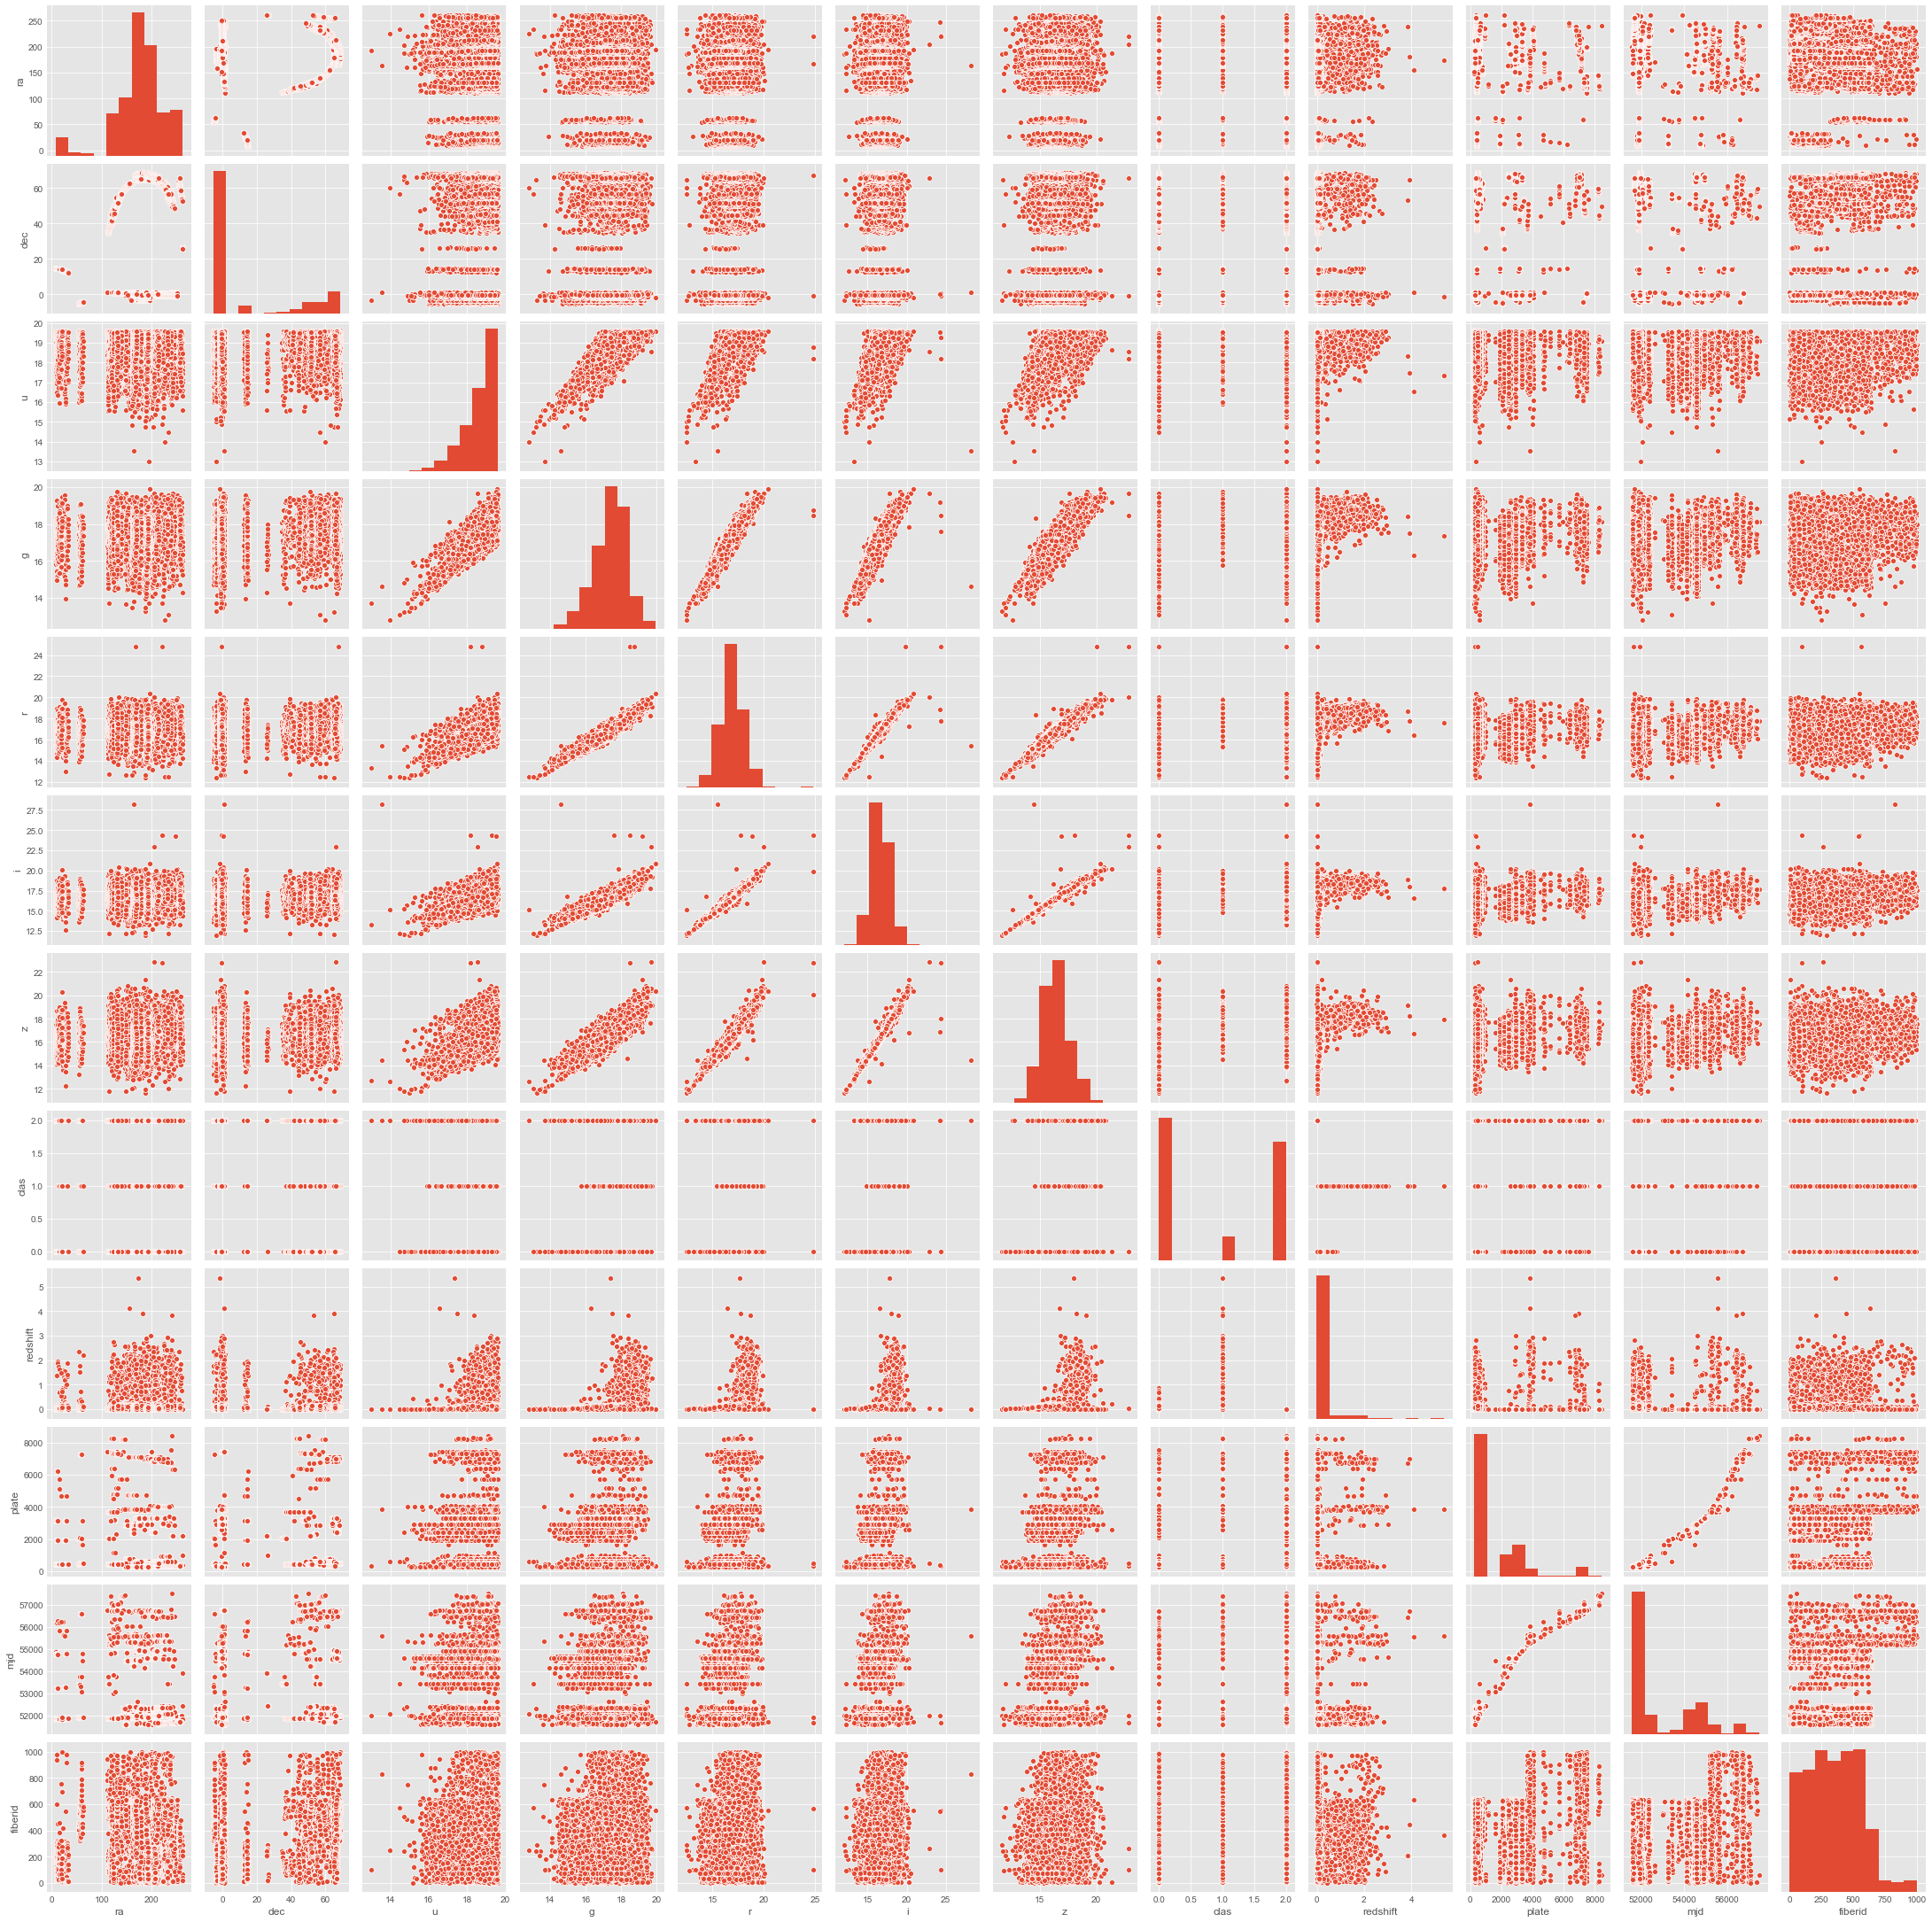

In [23]:
# divirate analysis
sns.pairplot(space_data)

# Checking Correlation

In [24]:
dfcor=space_data.corr()
dfcor

,ra,dec,u,g,r,i,z,clas,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.043219,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,-0.058918,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,-0.269044,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,-0.099212,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.049628,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.146791,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.215758,0.424034,0.112397,0.095658,0.067980
clas,-0.043219,-0.058918,-0.269044,-0.099212,0.049628,0.146791,0.215758,1.000000,-0.075510,0.585495,0.648768,0.053593
redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,-0.075510,1.000000,-0.038091,-0.057957,0.046532
plate,-0.095329,0.088342,-0.129430,-0.054981,0.019787,0.072958,0.112397,0.585495,-0.038091,1.000000,0.966881,0.229811


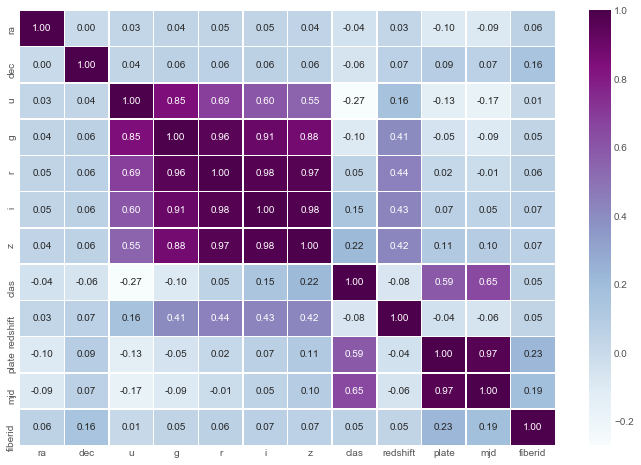

In [25]:
# visual representation of correlation in heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='BuPu',annot=True, fmt="0.2f", linewidths=0.5)
# Dark color reflects positive and light color reflect negative correlation

In [26]:
# Plotting Outliers
space_data.shape

(10000, 12)

In [27]:
collist = space_data.columns.values
ncol = 12
nrows =10

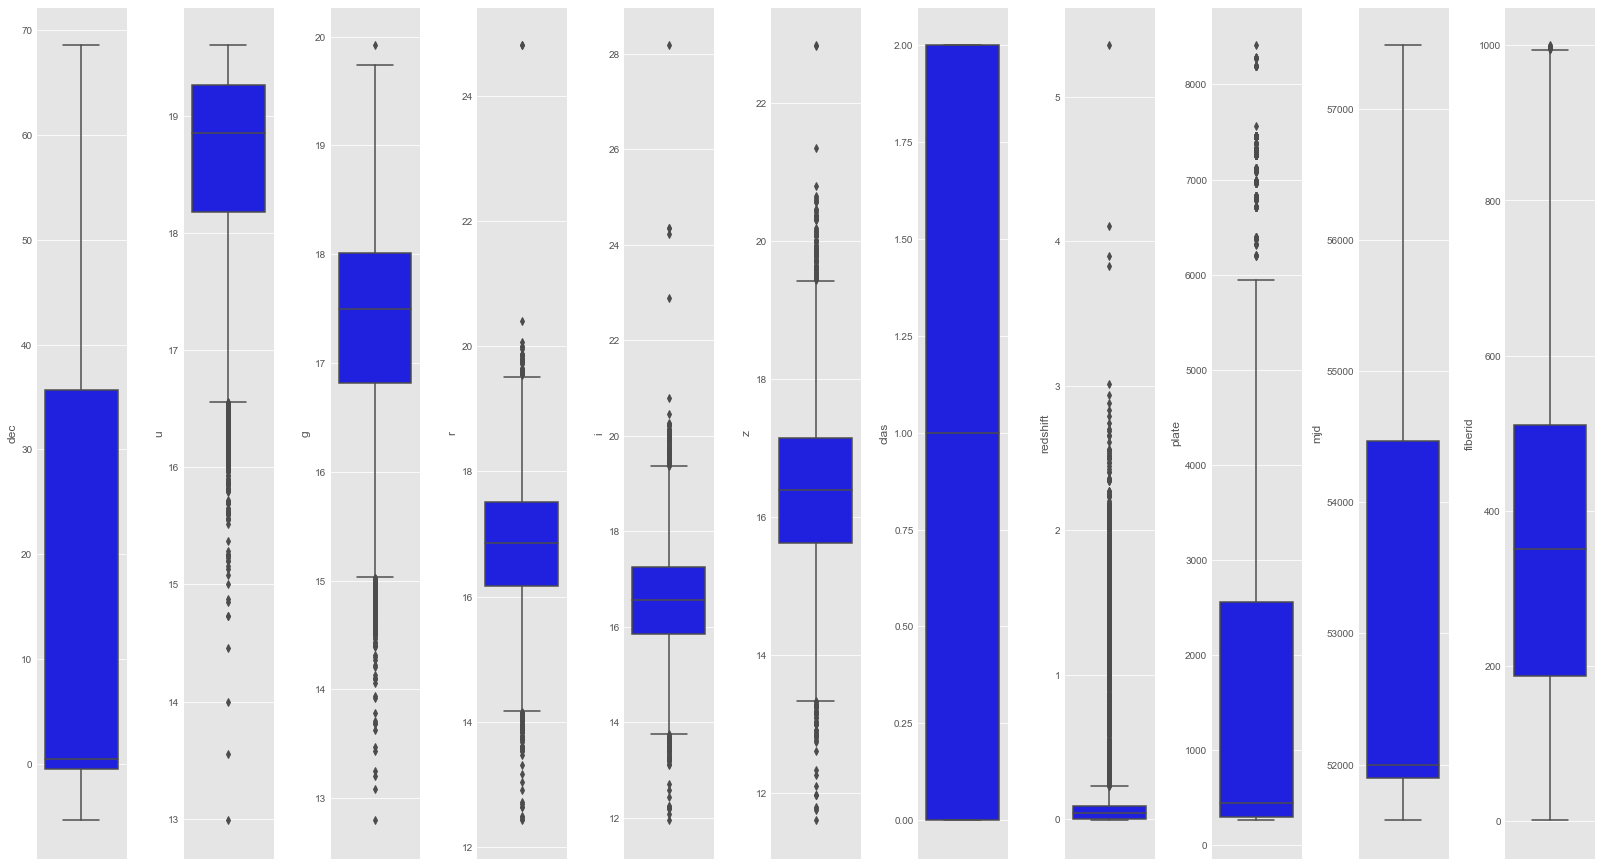

In [28]:
plt.figure (figsize=(2*ncol,10*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(space_data[collist[i]],orient='v',color='blue')
    plt.tight_layout()

In [29]:
# finding if there ia any outlier present 
# importing libraries

from scipy.stats import zscore
z_score=abs(zscore(space_data))
print(space_data.shape)
df_space = space_data.loc[(z_score<3).all(axis=1)]
print(df_space.shape)
#Outliers have been removed and the new shape of the dataset reflects below

(10000, 12)
(8698, 12)


# Checking Skewness

In [30]:
df_space.skew()

ra         -0.130951
dec         1.212911
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
clas        0.292107
redshift    4.951700
plate       1.320088
mjd         0.963989
fiberid     0.065374
dtype: float64

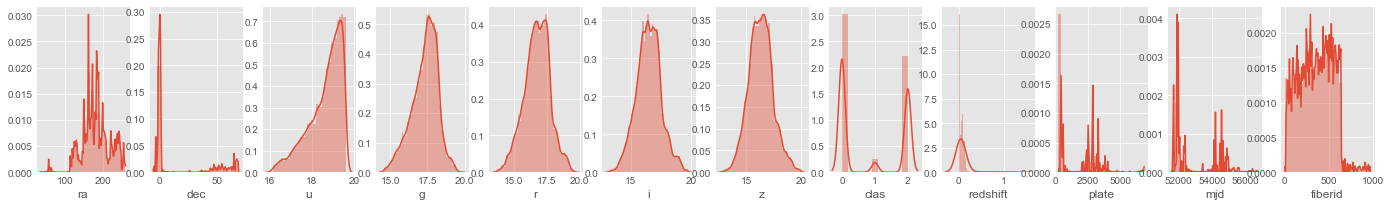

In [31]:
plt.figure(figsize=(24,36))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_space[collist[i]],kde_kws={'bw':0.1})

In [32]:
# treating skewness with log
import numpy as np
for col in df_space.columns:
    if df_space.skew().loc[col]>0.55:
        df_space[col] = np.log1p(df_space[col])

df_space.skew()
# skewness still presense

ra         -0.130951
dec         0.255429
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
clas        0.292107
redshift    4.195758
plate       0.752026
mjd         0.949578
fiberid     0.065374
dtype: float64

In [33]:
# checking null value 
df_space.isnull().sum()
# we see that after treating skewness there is NaN value reflecting in the "dec" column

ra             0
dec         1069
u              0
g              0
r              0
i              0
z              0
clas           0
redshift       0
plate          0
mjd            0
fiberid        0
dtype: int64

In [34]:
# treating with square root
list = ['redshift','plate','mjd']
for i in list:
    df_space[i]=np.sqrt(df_space[i])

df_space.skew()
# skewness still reflecting

ra         -0.130951
dec         0.255429
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
clas        0.292107
redshift    1.153043
plate       0.725652
mjd         0.948931
fiberid     0.065374
dtype: float64

In [35]:
# treating with cube root
list = ['redshift','plate','mjd']
for i in list:
    df_space[i]=np.cbrt(df_space[i])

df_space.skew()
# skewness still reflecting

ra         -0.130951
dec         0.255429
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
clas        0.292107
redshift   -0.595516
plate       0.707816
mjd         0.948500
fiberid     0.065374
dtype: float64

In [36]:
# checking null value further
df_space.isnull().sum()
# we again see that after treating skewness there is NaN value reflecting in the "redshift" column
# we have to treat the null value or accept the data for ML with skewness

ra             0
dec         1069
u              0
g              0
r              0
i              0
z              0
clas           0
redshift    1588
plate          0
mjd            0
fiberid        0
dtype: int64

In [37]:
# Cleaning the data again
space_df = df_space.copy()
# finding the mean value of the columns
print("dec_mean_value: ", space_df.dec.mean(), sep = '\n')
print("*"*50)
print("redshift_mean_value: ", space_df.redshift.mean(), sep = '\n')

dec_mean_value: 
1.0183358883710634
**************************************************
redshift_mean_value: 
0.5448062095049548


In [38]:
# inputing the null value with columns respectice mean value
space_df = space_df.fillna({'dec': 1.0183})
space_df = space_df.fillna({'redshift': 0.5448})

In [39]:
space_df.isnull().sum()
# No null value reflecting after imputing

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
clas        0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [40]:
space_df.skew()
# Skewness is still present however we'll go for ML

ra         -0.130951
dec         0.272738
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
clas        0.292107
redshift   -0.658627
plate       0.707816
mjd         0.948500
fiberid     0.065374
dtype: float64

# Seperating input and output 

In [41]:
# defining x and y 
x = space_df.drop("clas", axis =1)
y = space_df["clas"].copy()

In [42]:
x.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,183.531326,0.085896,19.47406,17.04240,15.94699,15.50342,15.22531,0.544800,1.417255,1.489345,491
1,183.598371,0.126884,18.66280,17.21449,16.67637,16.48922,16.39150,0.544800,1.339668,1.487929,541
2,183.680207,0.118836,19.38298,18.19169,17.47428,17.08732,16.80125,0.698458,1.335080,1.488109,513
3,183.870529,0.048705,17.76536,16.60272,16.16116,15.98233,15.90438,0.544800,1.417255,1.489345,510
4,183.883288,0.097632,17.55025,16.26342,16.43869,16.55492,16.61326,0.289622,1.417255,1.489345,512


In [43]:
y.head(2)

0    2
1    2
Name: clas, dtype: int32

In [44]:
x.shape

(8698, 11)

In [45]:
y.shape

(8698,)

In [46]:
y.unique()

array([2, 0, 1])

In [47]:
# Scaling down using standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.02256312, -0.46600598,  1.07641039, ...,  1.554757  ,
         1.66495766,  0.75499423],
       [ 0.02442123, -0.44552143,  0.03976563, ..., -0.73643352,
        -0.89206422,  1.0168139 ],
       [ 0.0266893 , -0.44954353,  0.96002649, ..., -0.87193217,
        -0.56719672,  0.87019489],
       ...,
       [-1.42483409,  1.47220106, -0.45890387, ..., -0.37516989,
        -0.68313213, -0.62217719],
       [-1.42009301,  1.47297593,  0.32097561, ..., -0.37516989,
        -0.68313213, -0.6169408 ],
       [-1.41488653,  1.4734706 ,  0.82314634, ..., -0.37516989,
        -0.68313213, -0.59599523]])

# Data ready for ML

In [48]:
# importing important libraries

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
# finding best random state between 42 to 100 with test_size=0.22
max_r_score = 0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size=0.22)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_predict = lr.predict(x_test)
    r2_scr = r2_score(y_test, y_predict)
    print("r2_score corresponding to random state: ",r_state," is: ", r2_scr)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
    print()
    print()
    print("Maximum r2 score corresponding to",final_r_state, "is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.7575489417951133


Maximum r2 score corresponding to 42 is  0.7575489417951133
r2_score corresponding to random state:  43  is:  0.7216142457831154


Maximum r2 score corresponding to 42 is  0.7575489417951133
r2_score corresponding to random state:  44  is:  0.7586101602271977


Maximum r2 score corresponding to 44 is  0.7586101602271977
r2_score corresponding to random state:  45  is:  0.754208561055168


Maximum r2 score corresponding to 44 is  0.7586101602271977
r2_score corresponding to random state:  46  is:  0.7593276409666703


Maximum r2 score corresponding to 46 is  0.7593276409666703
r2_score corresponding to random state:  47  is:  0.763217975403887


Maximum r2 score corresponding to 47 is  0.763217975403887
r2_score corresponding to random state:  48  is:  0.7692781402850876


Maximum r2 score corresponding to 48 is  0.7692781402850876
r2_score corresponding to random state:  49  is:  0.7681100414700065


Maximum r2 scor

In [50]:
# Since the maximum r2 score is coming around 0.769 with random state 48.
# However checking with other models to see if we get any better score 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=48,test_size=0.22)

In [51]:
x_train.shape

(6784, 11)

In [52]:
y_train.shape

(6784,)

In [53]:
x_test.shape

(1914, 11)

In [54]:
y_test.shape

(1914,)

In [55]:
# finding the best parameters for each model using gridsearchCV

In [56]:
svr=SVR()
parameters = {'kernel':('linear','poly','rbf'), 'C':[1,10]}
svgs = GridSearchCV(svr, parameters, cv = 5)
svgs.fit(x_train,y_train)
svgs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [57]:
knn = KNeighborsRegressor()
parameters = {'n_neighbors':range(1,30)}
knngs = GridSearchCV(knn, parameters, cv = 5)
knngs.fit(x_train, y_train)
knngs.best_params_

{'n_neighbors': 6}

In [58]:
rfr = RandomForestRegressor()
parameters = {'n_estimators':[50,100,150,200,250,300]}
rfgs = GridSearchCV(rfr, parameters, cv = 5)
rfgs.fit(x_train, y_train)
rfgs.best_params_

{'n_estimators': 50}

In [59]:
dtr = DecisionTreeRegressor()
parameters = {'criterion':('mse','friendman_mse', 'mse')}
dtgs = GridSearchCV(dtr, parameters, cv = 5)
dtgs.fit(x_train, y_train)
dtgs.best_params_

{'criterion': 'mse'}

In [60]:
lso = Lasso()
parameters = {'alpha':[0.001,0.01,0.1,1]}
lsgs = GridSearchCV(lso, parameters, cv = 5)
lsgs.fit(x_train, y_train)
lsgs.best_params_

{'alpha': 0.001}

In [61]:
gbr = GradientBoostingRegressor()
parameters = {'learning_rate':[0.001,0.01,0.1,1], 'n_estimators':[10,100,500,1000]}
gbgs = GridSearchCV(gbr, parameters, cv = 5)
gbgs.fit(x_train, y_train)
gbgs.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [62]:
lr = LinearRegression()
svr = SVR(C=10, kernel = 'rbf')
knn = KNeighborsRegressor(n_neighbors = 6)
rfr = RandomForestRegressor(n_estimators = 50)
dtr = DecisionTreeRegressor(criterion ='mse')
lso = Lasso(alpha =0.001 )
gbr = GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 1000)

In [63]:
models = []
models.append(('LineatRegression', lr))
models.append(('SVR', svr))
models.append(('KNeighborsRegressor', knn))
models.append(('RandomForestRegressor', rfr))
models.append(('DecisionTreeRegressor', dtr))
models.append(('Lasso', lso))
models.append(('GradientBoostingRegressor', gbr))

In [64]:
# Testing all required models with best parameters calculated

Model = []
score = []
rmse = []
mae = []
mse = []
cvs = []
std = []

for name,model in models:
    print ('******************', name ,'********************')
    print("\n")
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    rscore = r2_score(y_test, pred)
    print("r2 Score =", rscore)
    score.append(rscore*100)
    print("\n")
    RMS = np.sqrt(mean_squared_error(y_test, pred))
    print("RMSE =", RMS)
    rmse.append(RMS*100)
    print("\n")
    MA = mean_absolute_error(y_test, pred)
    print("MAE =", MA)
    mae.append(MA*100)
    print("\n")
    MS = mean_squared_error(y_test, pred)
    print("MSE =", MS)
    mse.append(MS*100)
    print("\n")
    cvscore = cross_val_score(model, x, y, cv = 10).mean()
    print("Cross_Val_Score =", cvscore)
    cvs.append(cvscore*100)
    print("\n")
    stdscore = cross_val_score(model, x, y, cv = 10).std()
    print("Standard Deviation =", stdscore)
    std.append(stdscore*100)
    print("\n\n")

****************** LineatRegression ********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 Score = 0.7692781402850876


RMSE = 0.46318436799945384


MAE = 0.3338873909290648


MSE = 0.21453975875905348


Cross_Val_Score = 0.7403300677815128


Standard Deviation = 0.039921604293435824



****************** SVR ********************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


r2 Score = 0.8888318694277489


RMSE = 0.32151384070529543


MAE = 0.15260781754478106


MSE = 0.1033711497650701


Cross_Val_Score = 0.8645601446417173


Standard Deviation = 0.03342333898427737



****************** KNeighborsRegressor ********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')


r2 Score = 0.847

In [65]:
import pandas as pd
result = pd.DataFrame({'Model': Model, 'r2_score': score, 'Root_mean_square': rmse, 'Mean_absolute_error': mse, 'Mean_square_error': mse, 'Cross_val_score_mean': cvs, 'Cross_val_score_Std': std})
result

,Model,r2_score,Root_mean_square,Mean_absolute_error,Mean_square_error,Cross_val_score_mean,Cross_val_score_Std
0,LineatRegression,76.927814,46.318437,21.453976,21.453976,74.033007,3.992160
1,SVR,88.883187,32.151384,10.337115,10.337115,86.456014,3.342334
2,KNeighborsRegressor,84.717024,37.697581,14.211076,14.211076,81.969648,4.248545
3,RandomForestRegressor,98.699401,10.997176,1.209379,1.209379,98.439726,0.904319
4,DecisionTreeRegressor,97.303004,15.836152,2.507837,2.507837,97.435613,1.195317
5,Lasso,76.774339,46.472235,21.596686,21.596686,74.049033,3.891353
6,GradientBoostingRegressor,99.006639,9.610877,0.923690,0.923690,98.574924,0.560841


In [66]:
# The above result shows that GradientBoostingRegressorr is giving the best result

In [67]:
from sklearn.externals import joblib
joblib.dump(gbr,'Space_Server.obj')

['Space_Server.obj']

In [68]:
model=joblib.load('Space_Server.obj')

In [69]:
model.predict(x_test)

array([0.01435015, 0.0165768 , 0.00454838, ..., 0.00564742, 0.02763309,
       1.99644442])